**Extracción de características**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [18]:
file = 'C:/Users/Ivan/Desktop/Dataset_Mineria/listings_cleanv2.csv'

In [19]:
all_variables = ['price', 'minimum_nights', 'number_of_reviews', 
                 'calculated_host_listings_count', 'availability_365','room_type']

In [20]:
features = ['price', 'minimum_nights', 'number_of_reviews', 
                 'calculated_host_listings_count', 'availability_365']

In [21]:
target = ['room_type']

In [22]:
df = pd.read_csv(file, names=all_variables)

In [23]:
df.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type
0,1,65,0.56,1,53,Private room
1,4,33,0.55,2,48,Private room
2,5,2,0.03,1,354,Entire home/apt
3,3,64,0.63,1,301,Entire home/apt
4,2,136,1.19,1,337,Private room


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
df_sc.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0.000000,0.107926,0.016072,0.000000,0.145205
1,0.002669,0.053963,0.015780,0.004348,0.131507
2,0.003559,0.001686,0.000584,0.000000,0.969863
3,0.001779,0.106239,0.018118,0.000000,0.824658
4,0.000890,0.227656,0.034483,0.000000,0.923288


Hay **5** features o características en los datos originales. Así que PCA proporcionará el mismo número de componentes principales.

In [26]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,-102.145523,25.007391,-4.080736,-2.425059,-1.852703
1,-108.619661,-6.767530,-4.712198,0.155428,-1.234332
2,195.149958,-51.558926,-22.451986,-1.357207,-1.056768
3,145.252918,12.706414,-16.390734,-2.059282,-1.672997
4,184.640654,82.880640,-14.195769,-2.188655,-2.487400


In [27]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.46272538e-01, 1.95661015e-01, 3.98697798e-02, 1.80999658e-02,
       9.67018363e-05])

In [29]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,target
0,-102.145523,25.007391,-4.080736,-2.425059,-1.852703,Private room
1,-108.619661,-6.767530,-4.712198,0.155428,-1.234332,Private room
2,195.149958,-51.558926,-22.451986,-1.357207,-1.056768,Entire home/apt
3,145.252918,12.706414,-16.390734,-2.059282,-1.672997,Entire home/apt
4,184.640654,82.880640,-14.195769,-2.188655,-2.487400,Private room


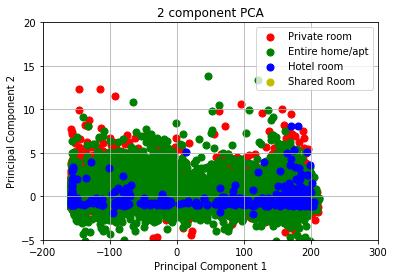

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
plt.xlim([-200,300])
plt.ylim([-5,20])
targets = ['Private room', 'Entire home/apt', 'Hotel room','Shared Room']
colors = ['r', 'g', 'b','y']


for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC5']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()